In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_data_science_Xinyue-Wang/main/MBAN6120/train.csv',sep=";")

In [3]:
df_test = pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_data_science_Xinyue-Wang/refs/heads/main/MBAN6120/test.csv',sep=";")

In [4]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
# Merge the training and the test datasets
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


# Part 1: Data Preprocessing 

### EDA

In [9]:
# check missing value
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
# check the 'pdays' variable
counts = (df['pdays'] != -1).sum()
counts

np.int64(9073)

In [11]:
# Using np.where to create new column 'contacted_before'
df['contacted_before'] = np.where(df['pdays'] == -1, 'no', 'yes')

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,contacted_before
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,yes


In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The minimum value of 'balance' is -8019, maximum is 102127, mean is almost 1362, and the std is 3044. 
The statistical parameters show that balance has variety of values and a lot of outliers.
Considering the outliers are meaningful in the sense of business importantce, we keep the outliers and convert the continous into categorical data.

In [14]:
# Convert 'balance' into categorical and create low, middle, high levels based on percentiles
df['balance_cat'] = pd.cut(df['balance'], bins=[-float('inf'), 72, 1431, float('inf')], labels=['low', 'middle', 'high'])
df['balance_cat'].value_counts(normalize=True) * 100

balance_cat
middle    49.943698
low       25.064345
high      24.991957
Name: proportion, dtype: float64

In [15]:
# Drop 'pdays' and 'balance' because they are converted into new variables. Drop 'day' because we feel it does not make much sense in the dataset. 
df = df.drop(columns=['pdays','day','balance'])

In [16]:
df.isna().sum()

age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
duration            0
campaign            0
previous            0
poutcome            0
y                   0
contacted_before    0
balance_cat         0
dtype: int64

### Basic Statistics

In [17]:
# Summary statistics for numerical columns
df.describe()

,age,duration,campaign,previous
count,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,258.690179,2.766549,0.576892
std,10.615008,257.743149,3.099075,2.254838
min,18.000000,0.000000,1.000000,0.000000
25%,33.000000,103.000000,1.000000,0.000000
50%,39.000000,180.000000,2.000000,0.000000
75%,48.000000,320.000000,3.000000,0.000000
max,95.000000,4918.000000,63.000000,275.000000


In [18]:
# Summary statistics for categorical columns
df.describe(include=['object','category'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y,contacted_before,balance_cat
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2,2,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,no,middle
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922,40659,24838


In [19]:
df['y'].value_counts()

y
no     43922
yes     5810
Name: count, dtype: int64

In [20]:
df['y'].value_counts(normalize=True) * 100

y
no     88.317381
yes    11.682619
Name: proportion, dtype: float64

### **Data Transformation and Cleaning in Exploratory Data Analysis:**

1. Get a general understanding of the data by checking the missing values, descriptive statistics, data format, etc.

2. Convert 'balance' into categorical and create low, middle, high levels based on percentiles.

3. Convert 'pdays' $\neq$ -1 into 'yes' and 'pdays' $=$ -1 into 'no'.

### **Basice findings about the datasets:**

1. There is no missing value in the datasets;  

2. The output variable 'y' is binary, which means whether the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not;  

3. The merged dataset is highly imbalanced with 88% 'no' and 12% 'yes'.

### Visualize Distributions

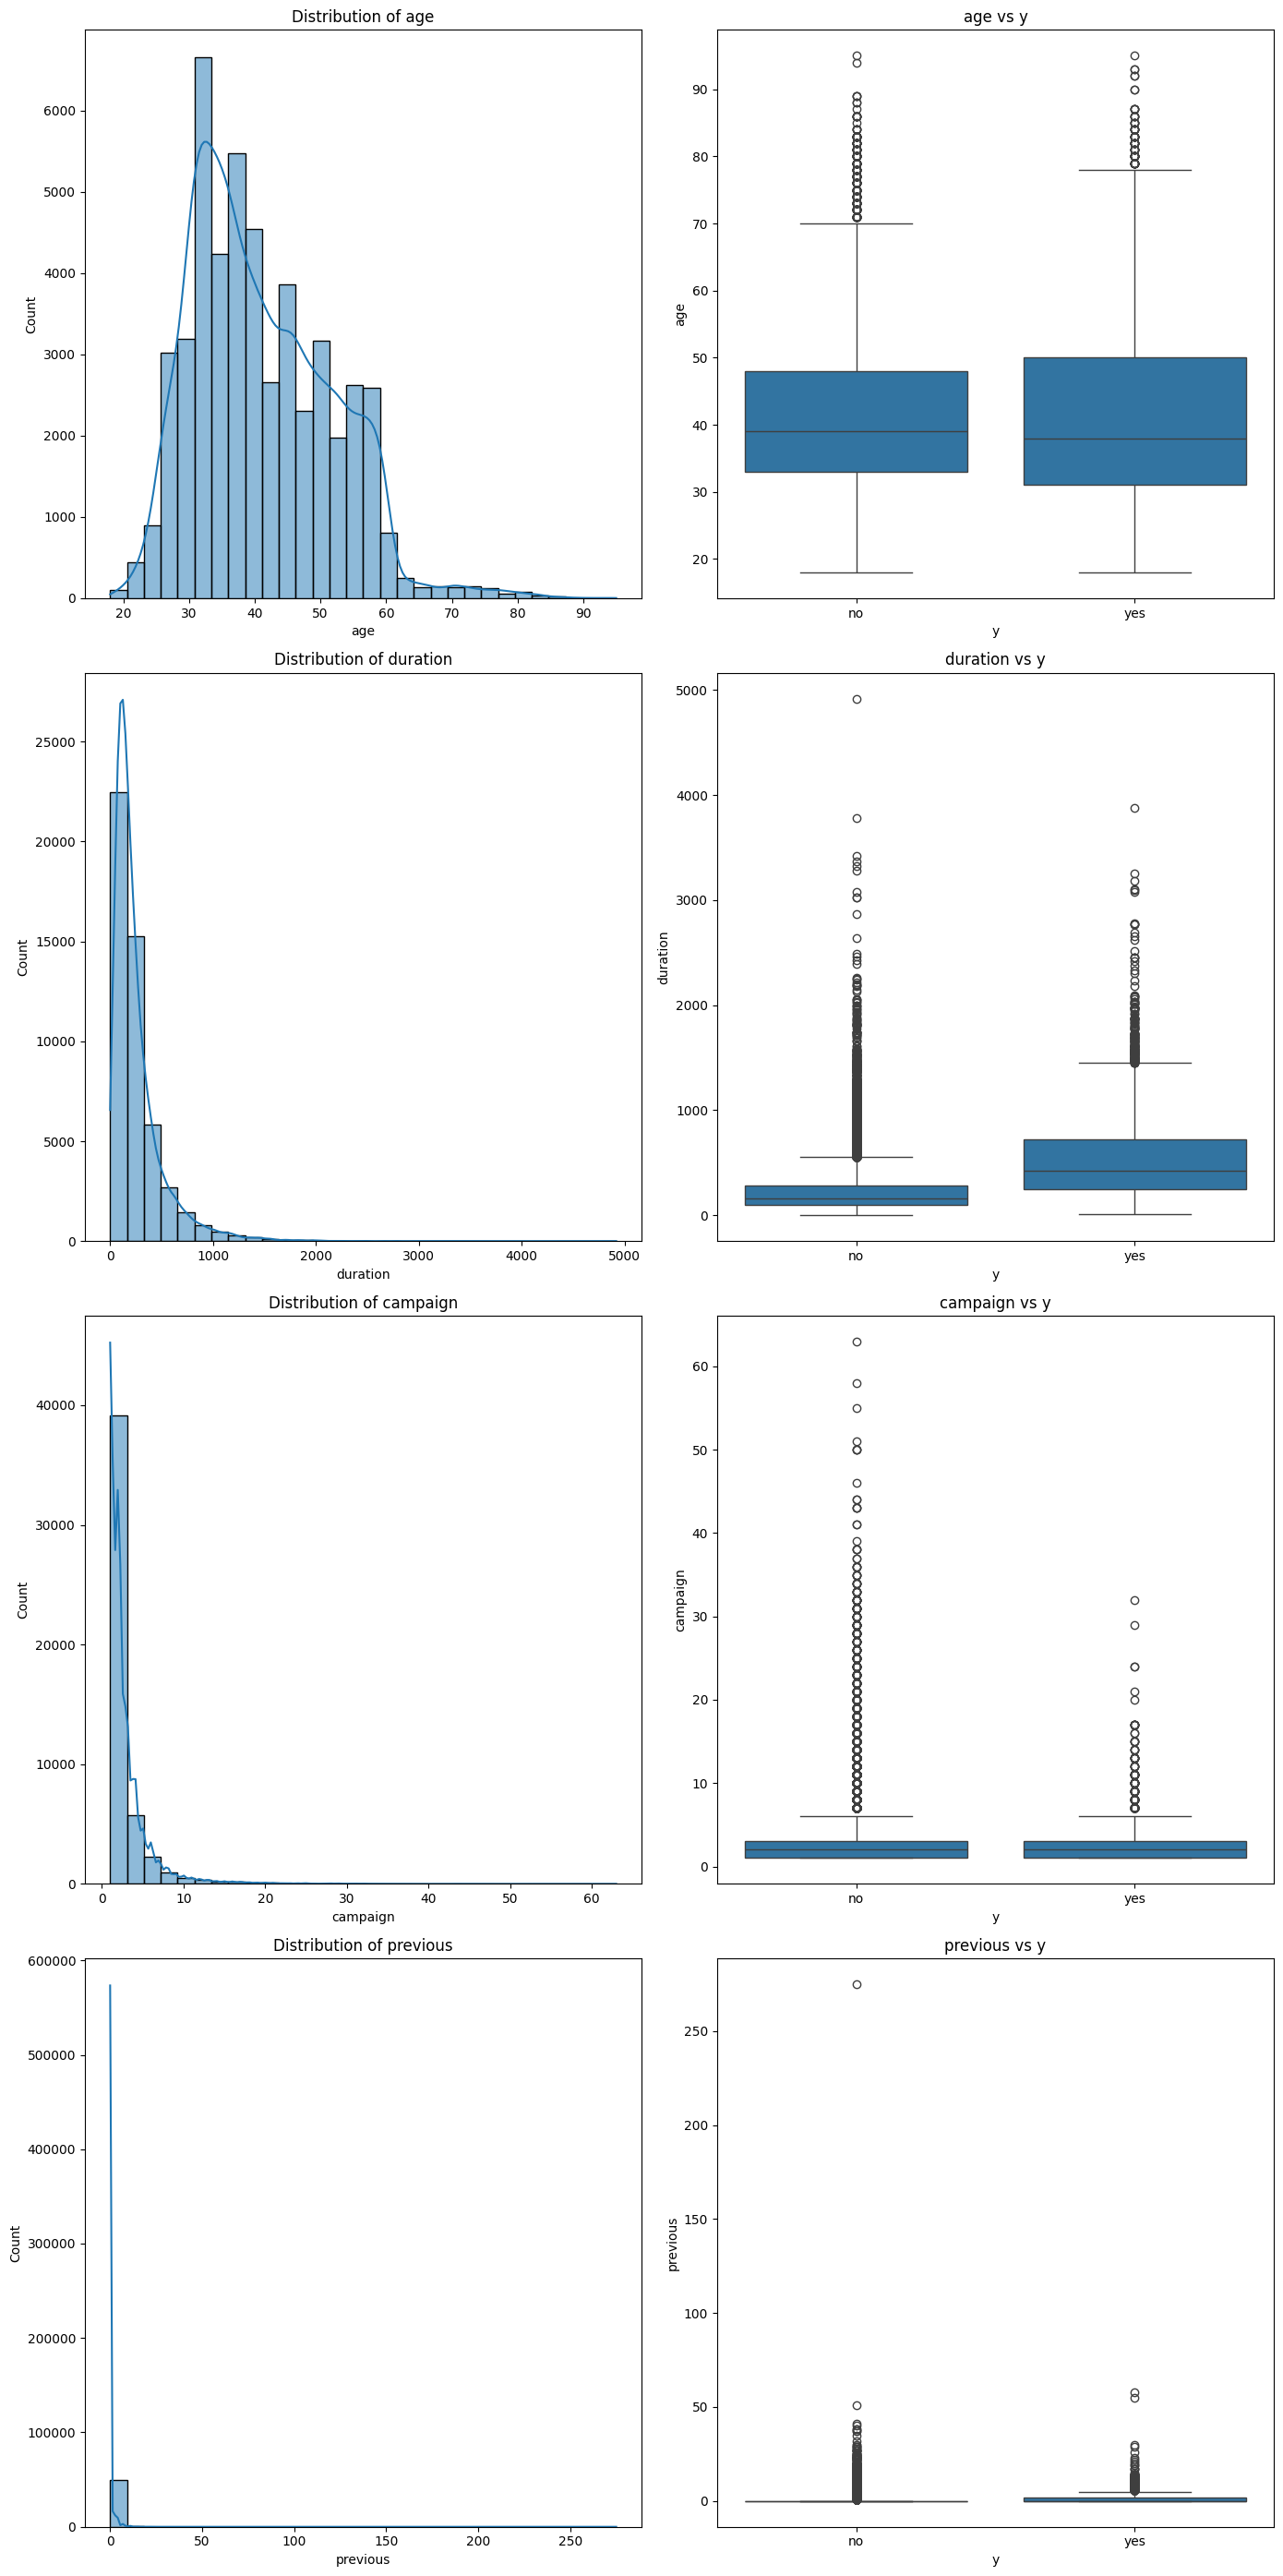

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['age', 'duration', 'campaign','previous']

# Create histograms and box plots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 28))

for i, feature in enumerate(numerical_features):
    # Histogram for the feature
    sns.histplot(df[feature], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {feature}')

    # Box plot to show relationship with target variable 'y'
    sns.boxplot(x='y', y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs y')

plt.tight_layout()
plt.show()


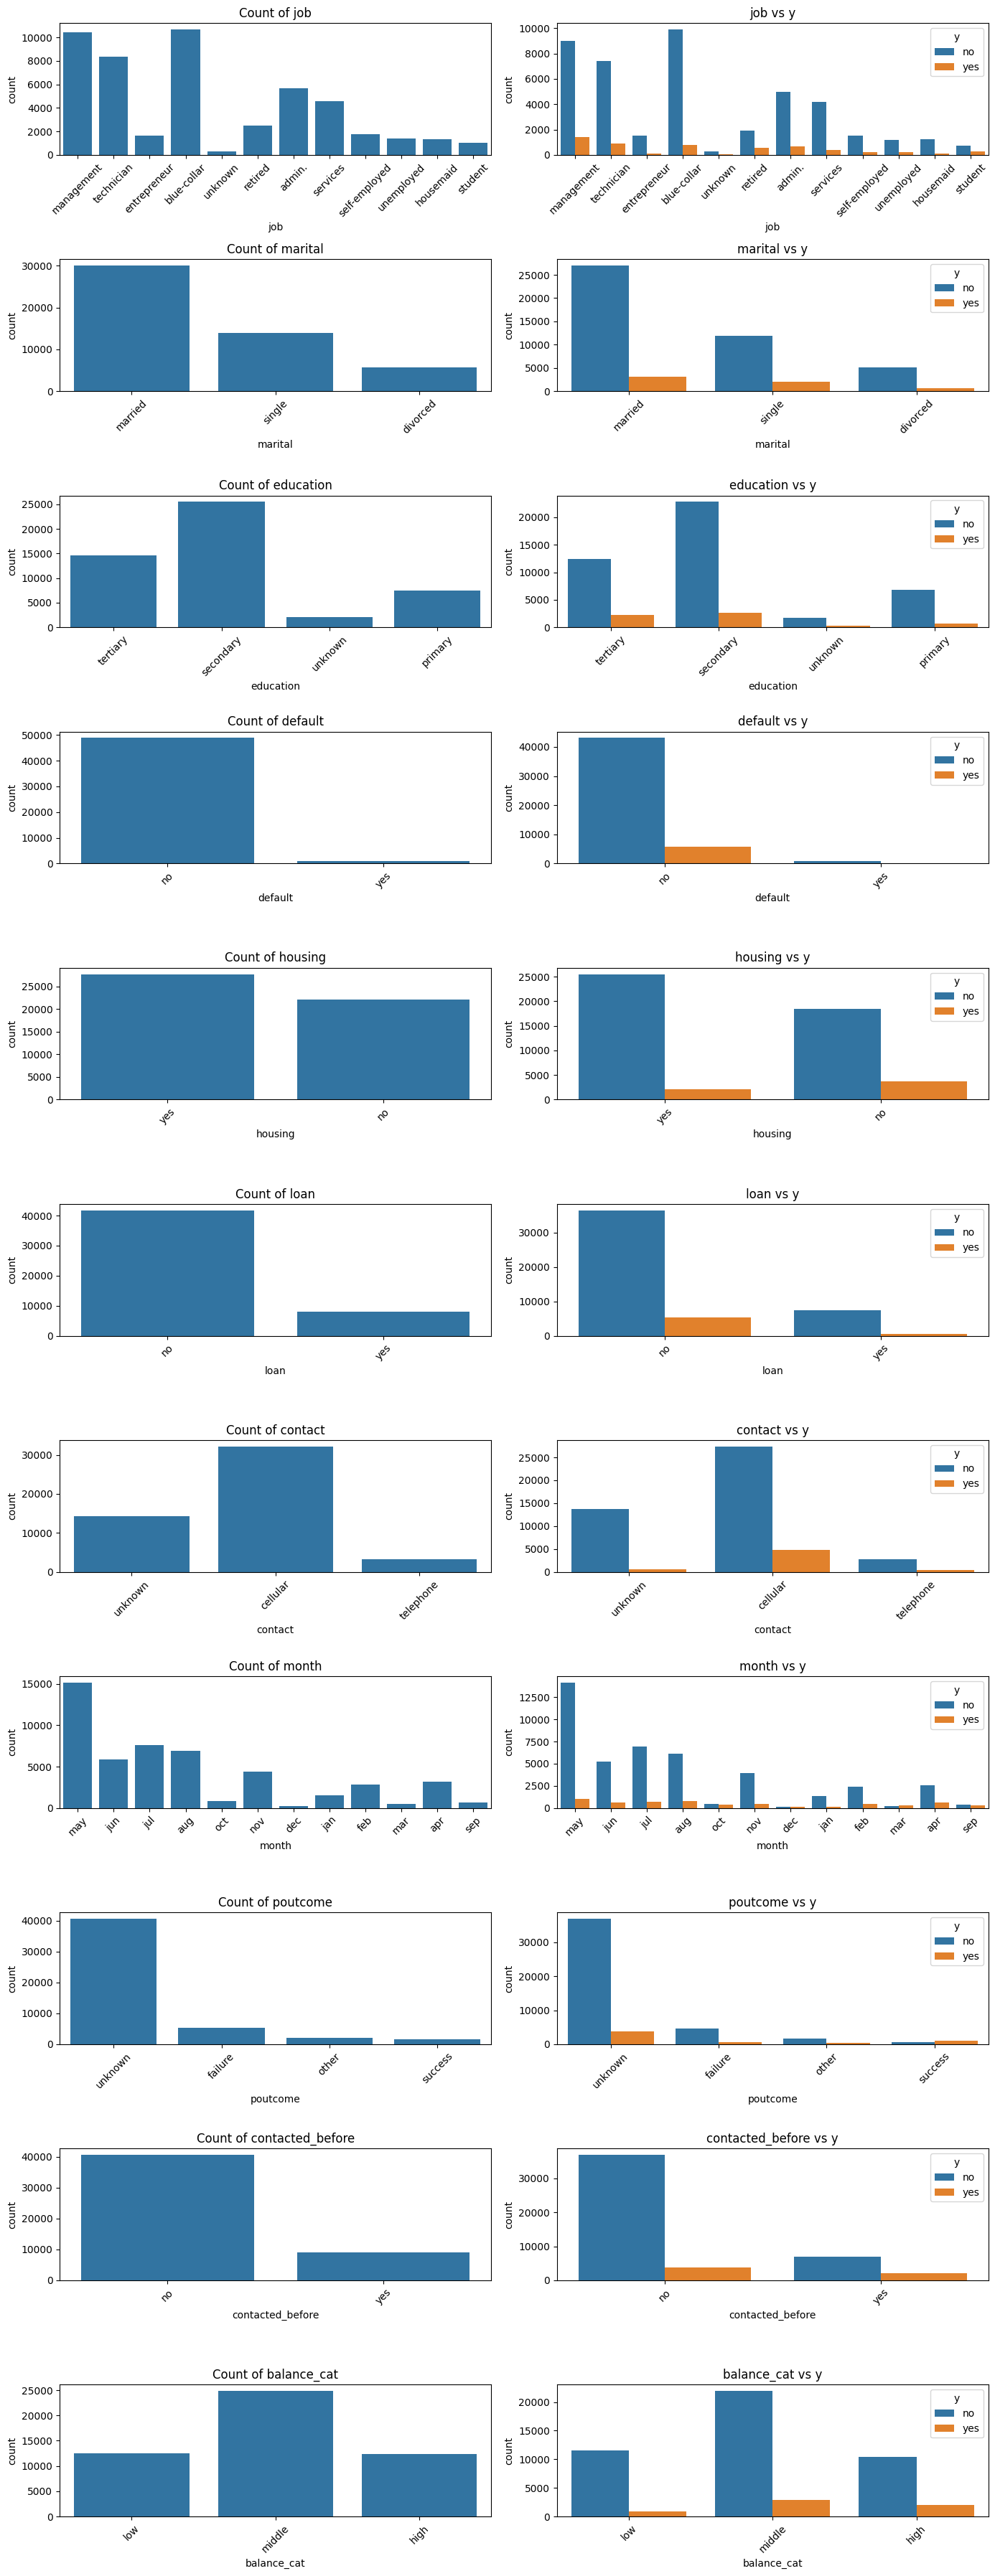

In [22]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'contacted_before','balance_cat']

# Create bar plots
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(14, 36))

for i, feature in enumerate(categorical_features):
    # Bar plot for the feature
    sns.countplot(x=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of {feature}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Bar plot to show relationship with target variable 'y'
    sns.countplot(x=feature, hue='y', data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs y')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'previous', 'poutcome', 'y',
       'contacted_before', 'balance_cat'],
      dtype='object')

In [24]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [25]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [26]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [27]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
# Check correlation of the numeric variables
df_copy = df.copy()
df_copy['y'] = df_copy['y'].replace({"yes": 1 , "no": 0})
numeric_data = df_copy.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_4511/838876624.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['y'] = df_copy['y'].replace({"yes": 1 , "no": 0})


,age,duration,campaign,previous,y
age,1.000000,-0.004399,0.003877,0.000928,0.026939
duration,-0.004399,1.000000,-0.083061,0.002330,0.395099
campaign,0.003877,-0.083061,1.000000,-0.035162,-0.072085
previous,0.000928,0.002330,-0.035162,1.000000,0.094567
y,0.026939,0.395099,-0.072085,0.094567,1.000000


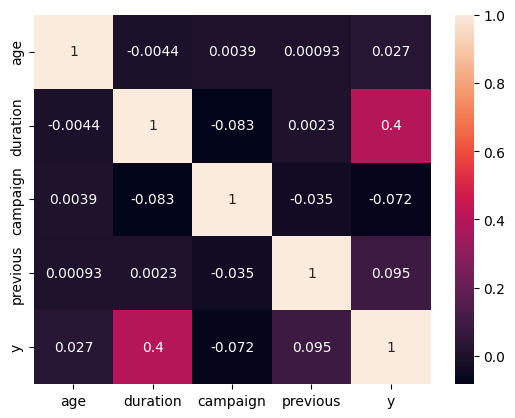

In [29]:
# Visualization of correlation
sns.heatmap(correlation_matrix, annot =True)
plt.show()

In [30]:
# Get all categorical variables (columns of object type)
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()

# Remove the target variable 'y' and do not one-hot encode it
categorical_columns.remove('y')

# One-hot encode all categorical variables using pandas.get_dummies
model = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# View the encoded data
model.head()


,age,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_before_yes,balance_cat_middle,balance_cat_high
0,58,261,1,0,no,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,True
1,44,151,1,0,no,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,33,76,1,0,no,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,47,92,1,0,no,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
4,33,198,1,0,no,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [31]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   49732 non-null  int64 
 1   duration              49732 non-null  int64 
 2   campaign              49732 non-null  int64 
 3   previous              49732 non-null  int64 
 4   y                     49732 non-null  object
 5   job_blue-collar       49732 non-null  bool  
 6   job_entrepreneur      49732 non-null  bool  
 7   job_housemaid         49732 non-null  bool  
 8   job_management        49732 non-null  bool  
 9   job_retired           49732 non-null  bool  
 10  job_self-employed     49732 non-null  bool  
 11  job_services          49732 non-null  bool  
 12  job_student           49732 non-null  bool  
 13  job_technician        49732 non-null  bool  
 14  job_unemployed        49732 non-null  bool  
 15  job_unknown           49732 non-null

In [32]:
model.describe()

,age,duration,campaign,previous
count,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,258.690179,2.766549,0.576892
std,10.615008,257.743149,3.099075,2.254838
min,18.000000,0.000000,1.000000,0.000000
25%,33.000000,103.000000,1.000000,0.000000
50%,39.000000,180.000000,2.000000,0.000000
75%,48.000000,320.000000,3.000000,0.000000
max,95.000000,4918.000000,63.000000,275.000000


In [33]:
model.describe(include=['bool'])

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_before_yes,balance_cat_middle,balance_cat_high
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,...,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
freq,39054,48077,48380,39305,47238,47970,45161,48710,41367,48301,...,34568,45373,48914,49101,47695,48092,40664,40659,24894,37303


In [34]:
model.describe(include=['object'])

,y
count,49732
unique,2
top,no
freq,43922


### **More findings from the visualization:**

1. From distribution visualization, we find 'job', 'education', 'month', 'housing', 'contacted_before' and 'balance_cat' may have some impacts on y.  

2. There is no significant correlation between numeric features. Duration may be a predictor on y.


# Part 2: Build Baseline Models 

### Prepare the Data

In [35]:
import statsmodels.api as sm

In [36]:
model['y'] = model['y'].map({'no': 0, 'yes': 1})

# Now split the data into features (X) and target (y)
X = model.drop('y', axis=1)
y = model['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Convert Boolean columns in X_train to integers
X_train = X_train.astype(int)

# Add a constant term (Intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit a Logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Output regression results, including coefficients and p-value
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.239723
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                34812
Model:                          Logit   Df Residuals:                    34769
Method:                           MLE   Df Model:                           42
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.3385
Time:                        20:39:29   Log-Likelihood:                -8345.2
converged:                       True   LL-Null:                       -12616.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1560      1.326     -2.381      0.017      -5.754      -0.558

### Train Baseline Models

In [38]:
# Initialize Logistic Regression and kNN models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Train k-NN
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluate baseline models
print("Logistic Regression - Baseline")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

print("\nk-NN - Baseline")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Baseline
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13209
           1       0.64      0.34      0.45      1711

    accuracy                           0.90     14920
   macro avg       0.78      0.66      0.70     14920
weighted avg       0.89      0.90      0.89     14920

Accuracy: 0.9022788203753351
ROC-AUC: 0.9059389974575454

k-NN - Baseline
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     13209
           1       0.50      0.28      0.36      1711

    accuracy                           0.88     14920
   macro avg       0.70      0.62      0.65     14920
weighted avg       0.86      0.88      0.87     14920

Accuracy: 0.8847855227882038
ROC-AUC: 0.7787905311713199


### Hyperparameter Tuning

In [39]:
# Tuning Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularizing strength
    'solver': ['liblinear', 'lbfgs']
    }  # Solver algorithms

In [40]:
## Initialize GridSearchCV for Logistic Regression
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                    param_grid=logistic_param_grid,
                                    cv=5,  # 5-fold cross-validation
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    verbose=2)


In [41]:
## Fit the grid search
grid_search_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV] END ................................C=0.1, solver=lbfgs; total time=   3.5s
[CV] END ................................C=0.1, solver=lbfgs; total time=   3.4s
[CV] END ................................C=0.1, solver=lbfgs; total time=   3.4s
[CV] END ................................C=0.1, solver=lbfgs; total time=   3.5s
[CV] END ................................C=0.1, solver=lbfgs; total time=   3.6s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.3s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV] END ..................................C=1, solver=lbfgs; total time=   3.6s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END ..................................C=1, solver=lbfgs; total time=   3.7s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, solver=lbfgs; total time=   3.6s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV] END ..................................C=1, solver=lbfgs; total time=   3.5s
[CV] END ..................................C=1, solver=lbfgs; total time=   3.7s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV] END .................................C=10, solver=lbfgs; total time=   3.6s
[CV] END .................................C=10, solver=lbfgs; total time=   3.6s
[CV] END .................................C=10, solver=lbfgs; total time=   3.6s
[CV] END .................................C=10, solver=lbfgs; total time=   3.7s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=10, solver=lbfgs; total time=   3.7s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=100, solver=lbfgs; total time=   3.5s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV] END ................................C=100, solver=lbfgs; total time=   2.7s
[CV] END ................................C=100, solver=lbfgs; total time=   2.6s
[CV] END ................................C=100, solver=lbfgs; total time=   2.3s


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=100, solver=lbfgs; total time=   2.4s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [42]:
## Best parameters and accuracy for Logistic Regression
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_
print(f"Best Logistic Regression Parameters: {best_params_logistic}")
print(f"Best Logistic Regression Accuracy: {best_score_logistic:.2f}")

Best Logistic Regression Parameters: {'C': 100, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.90


In [43]:
# Tuning k-NN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], # Number of neighbors
                  'weights': ['uniform', 'distance'], # Weight function used in prediction
                  'metric': ['euclidean', 'manhattan'] # Distance metric
                  }

In [44]:
## k-NN GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=knn_param_grid,
                               cv=StratifiedKFold(n_splits=5),  # Ensures balanced folds
                               scoring='roc_auc')

In [45]:
## Fit the grid search
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [46]:
## Print Knn score
print("\nk-NN CV results:")
for mean, params in zip(grid_search_knn.cv_results_['mean_test_score'], grid_search_knn.cv_results_['params']):
    print(f"Mean ROC-AUC: {mean:.4f} for {params}")


k-NN CV results:
Mean ROC-AUC: 0.7438 for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Mean ROC-AUC: 0.7560 for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Mean ROC-AUC: 0.7778 for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Mean ROC-AUC: 0.7954 for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mean ROC-AUC: 0.7991 for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Mean ROC-AUC: 0.8191 for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mean ROC-AUC: 0.8112 for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mean ROC-AUC: 0.8331 for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean ROC-AUC: 0.7646 for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Mean ROC-AUC: 0.7764 for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mean ROC-AUC: 0.8029 for {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'

###  Evaluate Tuned Models

In [47]:
# Predict using the best models
y_pred_log_reg_tuned = grid_search_logistic.predict(X_test)

# Evaluate tuned models
print("\nLogistic Regression - Tuned")
print(classification_report(y_test, y_pred_log_reg_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_tuned))
print("ROC-AUC:", roc_auc_score(y_test, grid_search_logistic.predict_proba(X_test)[:, 1]))




Logistic Regression - Tuned
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13209
           1       0.64      0.34      0.45      1711

    accuracy                           0.90     14920
   macro avg       0.78      0.66      0.70     14920
weighted avg       0.89      0.90      0.89     14920

Accuracy: 0.9022788203753351
ROC-AUC: 0.9058048417212304


### **Evaluate the Logistic Regression model:**  

1. Best Parameters: {'C': 100, 'solver': 'lbfgs'}  
   Best Accuracy: 0.90  
   
2. Based on the provided accuracy of 0.90, this model performs well overall, with high precision and relatively low recall. Parameter tuning seems not improve the accuracy much.

In [48]:
y_pred_knn_tuned = grid_search_knn.predict(X_test)
print("\nk-NN - Tuned")
print(classification_report(y_test, y_pred_knn_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("ROC-AUC:", roc_auc_score(y_test, grid_search_knn.predict_proba(X_test)[:, 1]))


k-NN - Tuned
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13209
           1       0.64      0.36      0.46      1711

    accuracy                           0.90     14920
   macro avg       0.78      0.67      0.70     14920
weighted avg       0.89      0.90      0.89     14920

Accuracy: 0.9035522788203754
ROC-AUC: 0.8536177735820187


### **Evaluate the KNN model:**  

1. Best ROC-AUC Performance: The highest Mean ROC-AUC was 0.85 for {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}.  

2. Based on ROC-AUC scores from tuning, the best configuration (Manhattan distance, 9 neighbors, distance weighting) showed promising performance. These metrics will help confirm its effectiveness.

# PART 3 Ensemble Modelling

## Random Forest

### Build Random Forest Model

In [49]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

In [51]:
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train) 

# predict the mode 
y_pred = model.predict(X_test) 

# performance evaluation metrics 
print(classification_report(y_test, y_pred)) 

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13209
           1       0.70      0.50      0.58      1711

    accuracy                           0.92     14920
   macro avg       0.82      0.73      0.77     14920
weighted avg       0.91      0.92      0.91     14920

ROC-AUC Score: 0.73


**SMOTE generates synthetic minority class samples to balance the dataset**

In [52]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [53]:
model = RandomForestClassifier(random_state=42) 
model.fit(X_resampled, y_resampled) 

# predict the mode 
y_pred = model.predict(X_test) 

# performance evaluation metrics 
print(classification_report(y_test, y_pred)) 
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13209
           1       0.62      0.56      0.59      1711

    accuracy                           0.91     14920
   macro avg       0.78      0.76      0.77     14920
weighted avg       0.91      0.91      0.91     14920

ROC-AUC Score: 0.76


**After applying SMOTE, the recall for class 1 improved (from 0.50 to 0.57), meaning the model is now better at detecting true positives for the minority class. The ROC-AUC also improved from 0.73 to 0.76, indicating better overall class discrimination.**

**However, there’s a slight decrease in overall accuracy (from 0.92 to 0.91), which is expected after balancing the data since the model now gives more attention to the minority class (class 1), sometimes at the cost of the majority class.**


### Hyperparameter Tuning- GridSearchCV to obtain the best parameters for the model

In [54]:
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_search = GridSearchCV(RandomForestClassifier(), 
						param_grid=param_grid) 
grid_search.fit(X_resampled, y_resampled) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [57]:
rf_model = RandomForestClassifier(max_depth=9, 
							        max_features='log2',
									max_leaf_nodes=9, 
									n_estimators=150,
                                     random_state=42) 
rf_model.fit(X_resampled, y_resampled) 
y_pred_grid = rf_model.predict(X_test) 
print(classification_report(y_test, y_pred_grid)) 
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     13209
           1       0.40      0.53      0.46      1711

    accuracy                           0.85     14920
   macro avg       0.67      0.71      0.69     14920
weighted avg       0.87      0.85      0.86     14920

ROC-AUC Score: 0.76


**Hyperparameter Tuning doesn’t work all the time. Sometimes the Default Hyperparameters would be also considered to be the best estimators.**

***Drop in Accuracy:***
- The drop in overall accuracy (from 0.91 to 0.85) and precision for class 1 (from 0.64 to 0.39) indicates that after tuning, the model is less capable of correctly identifying the majority class (class 0) and is generating more false positives.

- Slight Improvement in Recall for Class 1:
The recall for class 1 improved slightly (from 0.50 to 0.52), meaning that the model is now detecting more true positives in the minority class. However, the improvement is not substantial.

***ROC-AUC Score Stagnation:***
- Even though precision and accuracy dropped, the ROC-AUC score remained at 0.76, suggesting that the overall ranking of predictions has not changed much. The model still has a good ability to differentiate between the classes, but hyperparameter tuning did not lead to a significant improvement.


## AdaBoost

### Build an AdaBoost model

In [58]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [59]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  
adb = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1, random_state=42)

# Train AdaBoost Classifier on the resampled data
model = adb.fit(X_train, y_train)

# Predict the response for the original test dataset
y_pred = model.predict(X_test)


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [60]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Test Accuracy: {accuracy:.2f}")

# Evaluate ROC-AUC 
if len(set(y_test)) == 2:  
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Best Model Test ROC-AUC: {auc:.2f}")
else:
    print("ROC-AUC is only valid for binary classification.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Best Model Test Accuracy: 0.90
Best Model Test ROC-AUC: 0.91
Confusion Matrix:
 [[12785   424]
 [ 1093   618]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     13209
           1       0.59      0.36      0.45      1711

    accuracy                           0.90     14920
   macro avg       0.76      0.66      0.70     14920
weighted avg       0.88      0.90      0.89     14920



#### Tune by SMOTE

In [61]:
# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create AdaBoost classifier object
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  
adb = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1, random_state=42)


# Train AdaBoost Classifier on the resampled data
model = adb.fit(X_resampled, y_resampled)

# Predict the response for the original test dataset
y_pred = model.predict(X_test)


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [62]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Test Accuracy: {accuracy:.2f}")

# Evaluate ROC-AUC 
if len(set(y_test)) == 2:  
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Best Model Test ROC-AUC: {auc:.2f}")
else:
    print("ROC-AUC is only valid for binary classification.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Best Model Test Accuracy: 0.87
Best Model Test ROC-AUC: 0.87
Confusion Matrix:
 [[12116  1093]
 [  804   907]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     13209
           1       0.45      0.53      0.49      1711

    accuracy                           0.87     14920
   macro avg       0.70      0.72      0.71     14920
weighted avg       0.88      0.87      0.88     14920



### Why Performance Might Drop After SMOTE:

#### 1. Increase in False Positives (Lower Precision):
- SMOTE increases the number of minority class instances by creating synthetic samples, which can sometimes lead the model to predict more false positives for the minority class (class 1). This is reflected in your lower precision for class 1 (0.45), meaning that many of the predicted class 1 instances are actually class 0 (false positives).

#### 2. Overfitting to Synthetic Data:
- Since SMOTE generates synthetic samples for the minority class, the model may overfit to this new data. Overfitting can cause the model to perform well on training data but struggle to generalize to unseen test data, leading to lower test performance.

#### 3. Impact on Majority Class (Class 0):
- As the model starts to learn more from the synthetic minority class data, it may misclassify some of the majority class (class 0) as class 1. This is why your overall accuracy (0.87) and recall for class 0 (0.92) might drop slightly.

While SMOTE improved recall for the minority class (class 1), the trade-off is a reduction in precision, overall accuracy, and potentially some overfitting. However, the increase in recall means the model is doing a better job at identifying minority class instances.


### Tune Hyperparameters for AdaBoost using GridSearchCV

In [63]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]  # Tuning max depth of base Decision Tree
}

# Initialize a base estimator for AdaBoost (DecisionTree)
base_estimator = DecisionTreeClassifier(random_state=42)

# Create an AdaBoost classifier with the base estimator
adb = AdaBoostClassifier(estimator=base_estimator, random_state=42)

In [64]:
# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator found by GridSearchCV
best_adb_model = grid_search.best_estimator_

# Predict using the best AdaBoost model
y_pred_best = best_adb_model.predict(X_test)

/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Best parameters found:  {'estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}


In [65]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Test Accuracy: {accuracy:.2f}")

# Evaluate ROC-AUC (Only for binary classification)
if len(set(y_test)) == 2:  # Check if binary classification
    y_pred_proba = best_adb_model.predict_proba(X_test)[:, 1]  # Get probability for the positive class
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Best Model Test ROC-AUC: {auc:.2f}")
else:
    print("ROC-AUC is only valid for binary classification.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_best)
print("Best Model Classification Report:\n", class_report)

Best Model Test Accuracy: 0.89
Best Model Test ROC-AUC: 0.89
Best Model Confusion Matrix:
 [[12356   853]
 [  799   912]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     13209
           1       0.52      0.53      0.52      1711

    accuracy                           0.89     14920
   macro avg       0.73      0.73      0.73     14920
weighted avg       0.89      0.89      0.89     14920



**The hyperparameter-tuned model shows improved recall for class 1 but at the cost of a slight decrease in accuracy, precision, and class 0 recall. This is a common trade-off when balancing models on imbalanced datasets, as improvements in minority class performance often lead to a reduction in majority class performance.**

## Bagging Classifier

### Build a base estimator

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Model evaluation

In [67]:
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     13079
           1       0.55      0.51      0.53      1841

    accuracy                           0.89     14920
   macro avg       0.74      0.72      0.73     14920
weighted avg       0.88      0.89      0.89     14920



In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")

Cross-validation scores: [0.88076807 0.82024731 0.80102554 0.75970239 0.7660366 ]
Mean CV accuracy: 0.81


## Bagging classifier

In [70]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(estimator=pipeline, n_estimators=50, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('classifier',
                                             DecisionTreeClassifier(random_state=42))]),
                  n_estimators=50, random_state=42)

In [71]:
# Make prediction on the testing data
y_pred = bagging_classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13209
           1       0.66      0.54      0.59      1711

    accuracy                           0.91     14920
   macro avg       0.80      0.75      0.77     14920
weighted avg       0.91      0.91      0.91     14920

ROC-AUC Score: 0.75


In [72]:
# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")
roc_auc = roc_auc_score(y_test, y_pred)

Cross-validation scores: [0.89936664 0.82648035 0.82807159 0.80886789 0.77578926]
Mean CV accuracy: 0.83


### Define the hyperparameter grid

In [73]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_samples': [0.5, 1.0],  
    'max_features': [0.5, 1.0],  
    'estimator__classifier__max_depth': [3, 5, 10], 
    'estimator__classifier__min_samples_split': [2, 5, 10]  
}



In [74]:
# Set up the GridSearchCV object to tune hyperparameters
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
roc_auc = roc_auc_score(y_test, y_pred)



Best parameters found:  {'estimator__classifier__max_depth': 10, 'estimator__classifier__min_samples_split': 2, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}


In [75]:
# Use the best estimator from GridSearchCV to predict on the test data
best_bagging_model = grid_search.best_estimator_
y_pred_best = best_bagging_model.predict(X_test)

In [76]:

# 1. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Test Accuracy: {accuracy:.2f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:\n", conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred_best)
print("Best Model Classification Report:\n", class_report)

# 4. Cross-validation performance (using the best model found)
cv_scores = cross_val_score(best_bagging_model, X, y, cv=5)
print(f"Best Model Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Best Model Test Accuracy: 0.91
Best Model Confusion Matrix:
 [[12785   424]
 [  977   734]]


Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     13209
           1       0.63      0.43      0.51      1711

    accuracy                           0.91     14920
   macro avg       0.78      0.70      0.73     14920
weighted avg       0.90      0.91      0.90     14920

Best Model Cross-validation scores: [0.88700111 0.828491   0.83169113 0.81902272 0.80756083]
Mean CV accuracy: 0.83
ROC-AUC Score: 0.75


Bagging model increased accuracy from 0.89 to 0.91, precision from 0.55 to 0.63, and the ROC-AUC score from 0.72 to 0.75. However, recall decreased from 0.51 to 0.43, and the F1 score dropped from 0.53 to 0.51. This outcome suggests that the Bagging model helped mitigate the overfitting issue, although it may have impacted recall and F1 scores.

### Voting Classifier 

**Hard Voting Classifier:** This classifier combines the predictions of individual classifiers using majority voting (hard voting).

**Soft Voting Classifier:** This classifier combines the class probabilities of individual classifiers and selects the class with the highest probability (soft voting).

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [78]:
# Create the individual models
logistic = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [79]:
# Hard Voting Classifier (majority voting)
voting_clf_hard = VotingClassifier(estimators=[
    ('lr', logistic),
    ('rf', random_forest),
    ('xgb', xgb)], voting='hard')


In [80]:
# Soft Voting Classifier (averaging probabilities)
voting_clf_soft = VotingClassifier(estimators=[
    ('lr', logistic),
    ('rf', random_forest),
    ('xgb', xgb)], voting='soft')

In [81]:
# Fit the voting classifiers
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
accuracy_hard = voting_clf_hard.score(X_test, y_test)
accuracy_soft = voting_clf_soft.score(X_test, y_test)

# Print the accuracies for both hard and soft voting
print(f"Hard Voting Classifier Accuracy: {accuracy_hard:.2f}")
print(f"Soft Voting Classifier Accuracy: {accuracy_soft:.2f}")


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

Hard Voting Classifier Accuracy: 0.91
Soft Voting Classifier Accuracy: 0.91


In [82]:
# Predict probabilities for soft voting classifier
y_pred_proba_soft = voting_clf_soft.predict_proba(X_test)[:, 1]

# Hard voting classifier only predicts class labels
y_pred_hard = voting_clf_hard.predict(X_test)


roc_auc_soft = roc_auc_score(y_test, y_pred_proba_soft)


roc_auc_hard = roc_auc_score(y_test, y_pred_hard)

print(roc_auc_soft)
print(roc_auc_hard)

0.9321222857854343
0.7101807788368796


**Why we choose the three models?**

_The models selected are diverse in their approaches and each model brings unique strengths:_

- Logistic Regression provides a strong baseline for binary classification tasks and handles linearly separable data well. 
- Random Forest is effective in capturing non-linear relationships and reducing overfitting.
- Gradient boosting models like XGBoost or LightGBM combine the benefits of boosting (focusing on hard-to-predict instances) with efficient computation, leading to high accuracy in complex datasets.


# **Part 1-3 Conclusion**

***After each code chunk, we provided a detailed explanation of the actions taken for each step. Below is an overall conclusion.***

### **Step 1: EDA and data pre-processing**

- Check missing value
- Check the 'pdays' variable and create a new column 'contacted_before'
- Convert 'balance' into categorical and create low, middle, high levels based on percentiles
- Drop 'pdays', 'balance' and 'day'
- Visualize distributions of all variables and the input vs. output
- Use heatmap to check correlations and Z-test to check whether the input and output have significant relationships
- One-hot encode all categorical variables

***Summary of findings from Step 1:***
1. There is no missing value and the dataset is quite clear and well defined;
2. The merged dataset is highly imbalanced with 88% 'no' and 12% 'yes';
3.  From distribution visualization, we find some input variables such as job, education, month, housing, contacted_before and balance_cat may, duration have some impacts on y.
2. There is no significant correlation between numerical features. 

### **Step 2: Build baseline models**

-  Create baseline models using logistic regression and k-NN
- Tune the models by adjusting parameters like strength and solver algorithms, and apply GridSearchCV on the two models. 

### **Step 3: Build ensemble Modelling**
- Step 3 involved building and tuning ensemble models, including Random Forest, AdaBoost, Bagging Classifier, and Voting Classifier, to improve predictive performance through model combination.

# **Part 4: Performance Comparison**

|     Model( * = improved)  |        Accuracy        |  ROC-AUC    |       Time-Required     | 
|---------------------------|------------------------|-------------|-------------------------|
|Logistic Regression*       |          0.90          |     0.91    |      13s                   |
|K-NN*                      |          0.90          |     0.85    |       3min                  |
|Random Forest              |          0.92          |     0.73    |      4.40s              |
|Random Forest*             |          0.85          |     0.76    |      8.41min              |
|AdaBoost                   |          0.87          |     0.87    |       1s                |
|AdaBoost*                  |          0.89          |    0.89     |       2min              |
|Bagging Classifier         |          0.91          |     0.75    |       40s              |
|Bagging Classifier*        |          0.91          |    0.75     |      1.30min              |
|Voting Classifier_Hard     |          0.91          |      0.68     |       0                 |
|Voting Classifier_Soft     |          0.91          |      0.93     |       0                |

***Among all six models, we would choose **Logistic Regression**. The reasons for this choice are:***

- Based on the provided accuracy (0.90) and the ROC-AUC score (0.91), this model performs well overall, with high precision and recall indicating balanced performance.
- Logistic Regression is relatively simple and computationally efficient, making it faster (13s) to run compared to most other models, which helps reduce computational costs.
- Logistic Regression is highly interpretable. The coefficients associated with each feature directly indicate the strength and direction of the relationship between the feature and the probability of subscribing to the deposit.

***However, the model has some limitations:***

- It assumes a linear relationship between the features and the log-odds of the outcome. For non-linear relationships in the banking data, the model may not be ideal.
- Although the banking data has some non-linear patterns and noise, it may not be complex enough to require more flexible models like decision trees, Random Forests, or neural networks.

# **Step 5: Interpretation and Justification**

#### 1. Why did the ensemble models perform the way they did?

**a. Random Forest**

- Random Forest is an ensemble of decision trees, where each tree is trained on a different bootstrap sample of the data, and features are randomly selected at each split.

- The Random Forest performed well on the banking data, achieving an accuracy of 0.92 without any parameter tuning. This strong performance is likely due to the dataset containing a mixture of linear and non-linear relationships that the decision trees could effectively capture. Additionally, the dataset's numerous features individually contributed to the prediction, further enhancing the model's accuracy.

**b. AdaBoost**

- AdaBoost works by training a series of weak learners, with each subsequent model focusing on correcting the errors made by the previous ones.

- However, AdaBoost is sensitive to noisy data and outliers, which can lead to overfitting if the dataset contains such imperfections. The AdaBoost model achieved an accuracy of 0.91 and a ROC-AUC score of 0.89 before hyperparameter tuning. The precision and F1 scores for class 1 (clients who did not subscribe to a term deposit) were 0.63 and 0.51, respectively. These results suggest that the model's performance was affected by the presence of outliers and complex relationships in the dataset, to which AdaBoost is particularly sensitive due to its aggressive error correction approach.

**c. Bagging Classifier**

- Bagging involves building several instances of estimators on random subsets of the original training dataset and aggregating their predictions to form a final prediction. This method primarily reduces variance by introducing randomization and averaging the predictions of multiple models.

- Bagging is effective because samples are drawn with replacement, which helps reduce overfitting. In our model, Bagging increased accuracy from 0.89 to 0.91, precision from 0.55 to 0.63, and ROC-AUC score from 0.72 to 0.75. However, recall decreased from 0.51 to 0.43, and the F1 score dropped from 0.53 to 0.51. This outcome suggests that the base model (a decision tree) was prone to overfitting, and Bagging helped mitigate this issue, although it may have impacted recall and F1 scores.

**d. Voting Classifier**

- A Voting Classifier aggregates the predictions of multiple models and predicts the majority class (hard voting) or averages the predicted probabilities (soft voting).

- The success of a Voting Classifier depends on the diversity and complementarity of the models used, as it combines the strengths of multiple models to achieve better overall performance.

- We used three classifiers in the voting model: Logistic Regression, Random Forest Classifier, and Gradient Boosting Machine. The models performed well, with soft voting achieving an accuracy of 0.91. This strong result likely stems from the combination of the strengths of the three models. Soft voting might be preferable when the models have well-calibrated probabilities, as it takes into account the confidence of each model in its predictions.

#### 2. If you had to pick one model to implement in the business process, which would it be and why?

***Among the four ensemble models, we prefer **Random Forest** for the following reasons:***

- Random Forest can handle class imbalance effectively by reducing variance and preventing overfitting.
- Compared to models like AdaBoost, Random Forest is less likely to overfit and can handle non-linear relationships well, which is often the case in real-world datasets.
- Random Forest provides insights into feature importance, facilitating an understanding of which features are driving predictions, which is valuable in imbalanced contexts.
- While individual decision trees within the forest may be sensitive to outliers, the aggregation process in Random Forests mitigates the influence of outliers and noise, leading to more stable predictions. 

#### 3. What decision criteria did you use to arrive at this conclusion?

We considered several decision criteria commonly used in evaluating and selecting machine learning models. These criteria include:

- **A balance between performance metrics, computational cost, and interpretability:** Random Forest is recognized for its high accuracy and generally outperforms simpler models like Logistic Regression when the data contains intricate patterns or feature interactions. We also considered whether the models are computationally intensive in training and predicting, as reducing costs without compromising performance and interpretability is essential.
  
- **Ability to handle imbalance and make meaningful predictions on the minority class:** In cases where the target variable is imbalanced, such as when fewer clients subscribe to deposits (a common scenario in the real world), Random Forest can address this imbalance using class weights or sampling techniques. This flexibility makes it a strong candidate for imbalanced datasets, ensuring that the model does not overly favor the majority class.

- **Precision-Recall trade-off:** In a business context like banking, where the costs of false positives and false negatives can differ significantly, balancing precision and recall is crucial. Random Forest tends to provide a good balance between these metrics, particularly when adjusted with appropriate class weights or thresholds.

- **Robustness and generalization:** Random Forest mitigates overfitting by averaging the predictions of many decision trees. This ensemble approach enhances the model’s robustness and generalization to new, unseen data, ensuring strong performance not only on the training data but also in real-world applications. Since outliers and noisy data are common in real-world datasets, the robustness of ensemble models makes them a reliable choice for production environments where data quality may vary.
